# Всем большой большой привет :)

Можно запустить Rstudio или воспользоваться гугл-колабом!

[colab.to/r](colab.to/r)


In [9]:
url = "https://github.com/bdemeshev/webinar_eusp_forecasting_r_2021_03_13/raw/main/monthly_marriages_2020.csv"

Данные взяты из https://fedstat.ru/indicator/33553

In [10]:
install.packages(c("fable", "feasts", "rio", "tsibble", "tidyverse"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# ETS модель :)

Суровое детство. Изначально была нестатистической!

Где-то в 2005 году у ETS появилось статистическое обоснование!

ETS = Error + Trend + Seasonality

## Забудем на секунду про случайность :)

$y_t$ — наблюдаемый ряд

$s_t$ ­­— сезонная составляющая

$s_t = s_{t-12}$

$b_t$ — ежемесячный прирост (без учёта сезонности)

$b_t = b_{t-1}$

$\ell_t$ — показатель, очищенный от сезонности

$\ell_t = \ell_{t-1} + b_{t-1}$

$y_t= \ell_{t-1} + b_{t-1} + s_{t-12}$


## Добавим случайность :)

$u_t \sim N(0;\sigma^2)$ — случайная составляющая

$y_t$ — наблюдаемый ряд

$s_t$ ­­— сезонная составляющая

$s_t = s_{t-12} + \gamma u_t$

$b_t$ — ежемесячный прирост (без учёта сезонности)

$b_t = b_{t-1} + \beta u_t$

$\ell_t$ — показатель, очищенный от сезонности

$\ell_t = \ell_{t-1} + b_{t-1} + \alpha u_t$

$y_t= \ell_{t-1} + b_{t-1} + s_{t-12} + u_t$


In [ ]:
library(rio) # экспорт-импорт данных в разные форматы
library(tidyverse) # манипуляции с данными и графики
library(tsibble) # современный формат хранения рядов в памяти (ряд с ключами)
library(fable) # базовые модели ARIMA, ETS, ...
library(feasts) # извлечение характеристик ряда

In [14]:
data = import(url)
glimpse(data)

Rows: 19,620
Columns: 3
$ region    <chr> "643 Российская Федерация", "643 Российская Федерация", "643…
$ marriages <int> 55509, 59495, 58668, 65507, 62980, 57949, 55008, 56123, 5929…
$ date      <date> 2006-01-01, 2007-01-01, 2008-01-01, 2009-01-01, 2010-01-01,…


In [15]:
head(data)

,region,marriages,date
,<chr>,<int>,<date>
1,643 Российская Федерация,55509,2006-01-01
2,643 Российская Федерация,59495,2007-01-01
3,643 Российская Федерация,58668,2008-01-01
4,643 Российская Федерация,65507,2009-01-01
5,643 Российская Федерация,62980,2010-01-01
6,643 Российская Федерация,57949,2011-01-01


In [16]:
unique(data$region)

[1] "643 Российская Федерация"                                                                                            
  [2] "030 Центральный федеральный округ"                                                                                   
  [3] "14000000000 Белгородская область"                                                                                    
  [4] "15000000000 Брянская область"                                                                                        
  [5] "17000000000 Владимирская область"                                                                                    
  [6] "20000000000 Воронежская область"                                                                                     
  [7] "24000000000 Ивановская область"                                                                                      
  [8] "29000000000 Калужская область"                                                                                       
  [9] "34000000000 Костромская область"                                                                                     
 [10] "38000000000 Курская область"                                                                                         
 [11] "42000000000 Липецкая область"                                                                                        
 [12] "46000000000 Московская область"                                                                                      
 [13] "54000000000 Орловская область"                                                                                       
 [14] "61000000000 Рязанская область"                                                                                       
 [15] "66000000000 Смоленская область"                                                                                      
 [16] "68000000000 Тамбовская область"                                                                                      
 [17] "28000000000 Тверская область"                                                                                        
 [18] "70000000000 Тульская область"                                                                                        
 [19] "78000000000 Ярославская область"                                                                                     
 [20] "45000000000 Город Москва столица Российской Федерации город федерального значения"                                   
 [21] "041 Сибирский федеральный округ"                                                                                     
 [22] "84000000000 Республика Алтай"                                                                                        
 [23] "93000000000 Республика Тыва"                                                                                         
 [24] "95000000000 Республика Хакасия"                                                                                      
 [25] "01000000000 Алтайский край"                                                                                          
 [26] "04000000000 Красноярский край"                                                                                       
 [27] "04100000000 Таймырский (Долгано-Ненецкий) автономный округ (Красноярский край)"                                      
 [28] "04130000000 Эвенкийский автономный округ (Красноярский край)"                                                        
 [29] "25000000000 Иркутская область"                                                                                       
 [30] "25100000000 Усть-Ордынский Бурятский округ"                                                                          
 [31] "32000000000 Кемеровская область - Кузбасс"                                                                           
 [32] "50000000000 Новосибирская область"                                                                                   
 [

In [17]:
unique(data$date)

[1] "2006-01-01" "2007-01-01" "2008-01-01" "2009-01-01" "2010-01-01"
  [6] "2011-01-01" "2012-01-01" "2013-01-01" "2014-01-01" "2015-01-01"
 [11] "2016-01-01" "2017-01-01" "2018-01-01" "2019-01-01" "2020-01-01"
 [16] "2006-02-01" "2007-02-01" "2008-02-01" "2009-02-01" "2010-02-01"
 [21] "2011-02-01" "2012-02-01" "2013-02-01" "2014-02-01" "2015-02-01"
 [26] "2016-02-01" "2017-02-01" "2018-02-01" "2019-02-01" "2020-02-01"
 [31] "2006-03-01" "2007-03-01" "2008-03-01" "2009-03-01" "2010-03-01"
 [36] "2011-03-01" "2012-03-01" "2013-03-01" "2014-03-01" "2015-03-01"
 [41] "2016-03-01" "2017-03-01" "2018-03-01" "2019-03-01" "2020-03-01"
 [46] "2006-04-01" "2007-04-01" "2008-04-01" "2009-04-01" "2010-04-01"
 [51] "2011-04-01" "2012-04-01" "2013-04-01" "2014-04-01" "2015-04-01"
 [56] "2016-04-01" "2017-04-01" "2018-04-01" "2019-04-01" "2020-04-01"
 [61] "2006-05-01" "2007-05-01" "2008-05-01" "2009-05-01" "2010-05-01"
 [66] "2011-05-01" "2012-05-01" "2013-05-01" "2014-05-01" "2015-05-01"
 [71] "2016-05-01" "2017-05-01" "2018-05-01" "2019-05-01" "2020-05-01"
 [76] "2006-06-01" "2007-06-01" "2008-06-01" "2009-06-01" "2010-06-01"
 [81] "2011-06-01" "2012-06-01" "2013-06-01" "2014-06-01" "2015-06-01"
 [86] "2016-06-01" "2017-06-01" "2018-06-01" "2019-06-01" "2020-06-01"
 [91] "2006-07-01" "2007-07-01" "2008-07-01" "2009-07-01" "2010-07-01"
 [96] "2011-07-01" "2012-07-01" "2013-07-01" "2014-07-01" "2015-07-01"
[101] "2016-07-01" "2017-07-01" "2018-07-01" "2019-07-01" "2020-07-01"
[106] "2006-08-01" "2007-08-01" "2008-08-01" "2009-08-01" "2010-08-01"
[111] "2011-08-01" "2012-08-01" "2013-08-01" "2014-08-01" "2015-08-01"
[116] "2016-08-01" "2017-08-01" "2018-08-01" "2019-08-01" "2020-08-01"
[121] "2006-09-01" "2007-09-01" "2008-09-01" "2009-09-01" "2010-09-01"
[126] "2011-09-01" "2012-09-01" "2013-09-01" "2014-09-01" "2015-09-01"
[131] "2016-09-01" "2017-09-01" "2018-09-01" "2019-09-01" "2020-09-01"
[136] "2006-10-01" "2007-10-01" "2008-10-01" "2009-10-01" "2010-10-01"
[141] "2011-10-01" "2012-10-01" "2013-10-01" "2014-10-01" "2015-10-01"
[146] "2016-10-01" "2017-10-01" "2018-10-01" "2019-10-01" "2020-10-01"
[151] "2006-11-01" "2007-11-01" "2008-11-01" "2009-11-01" "2010-11-01"
[156] "2011-11-01" "2012-11-01" "2013-11-01" "2014-11-01" "2015-11-01"
[161] "2016-11-01" "2017-11-01" "2018-11-01" "2019-11-01" "2020-11-01"
[166] "2006-12-01" "2007-12-01" "2008-12-01" "2009-12-01" "2010-12-01"
[171] "2011-12-01" "2012-12-01" "2013-12-01" "2014-12-01" "2015-12-01"
[176] "2016-12-01" "2017-12-01" "2018-12-01" "2019-12-01" "2020-12-01"

In [18]:
data = mutate(data, date = yearmonth(date))
glimpse(data)

Rows: 19,620
Columns: 3
$ region    <chr> "643 Российская Федерация", "643 Российская Федерация", "643…
$ marriages <int> 55509, 59495, 58668, 65507, 62980, 57949, 55008, 56123, 5929…
$ date      <mth> 2006 Jan, 2007 Jan, 2008 Jan, 2009 Jan, 2010 Jan, 2011 Jan, …


In [21]:
data_ts = as_tsibble(data, index = date, key = region)
data_ts %>% head()

region,marriages,date
<chr>,<int>,<mth>
01000000000 Алтайский край,953,2006 Jan
01000000000 Алтайский край,1007,2006 Feb
01000000000 Алтайский край,1311,2006 Mar
01000000000 Алтайский край,1554,2006 Apr
01000000000 Алтайский край,562,2006 May
01000000000 Алтайский край,1900,2006 Jun


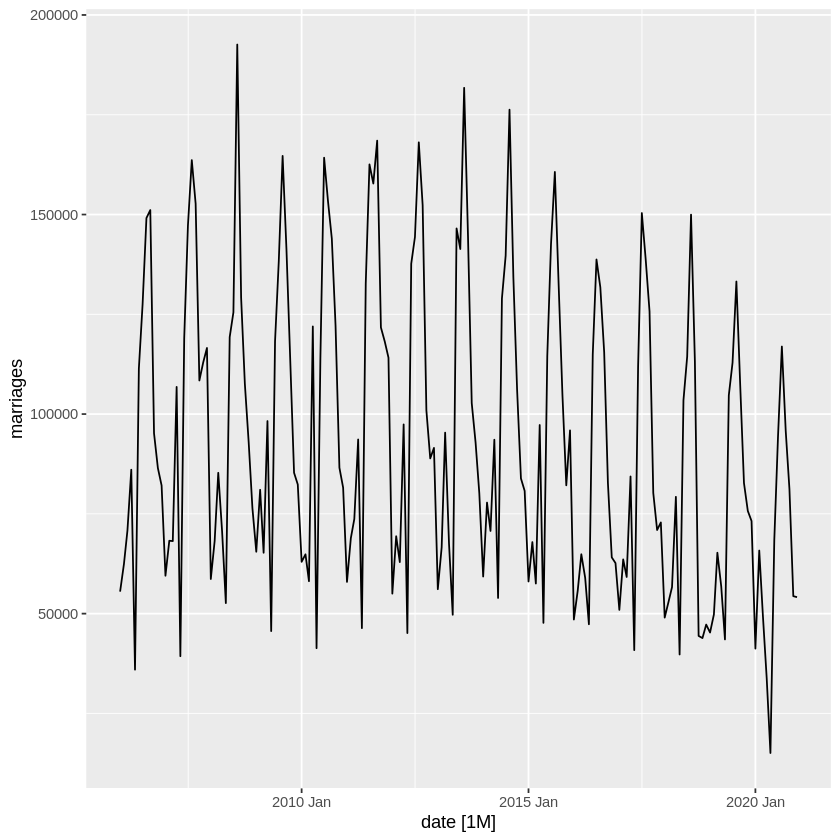

In [23]:
rf = '643 Российская Федерация' # код по Общероссийскому классификатору стран мира

data_rf = filter(data_ts, region == rf)
autoplot(data_rf, marriages)

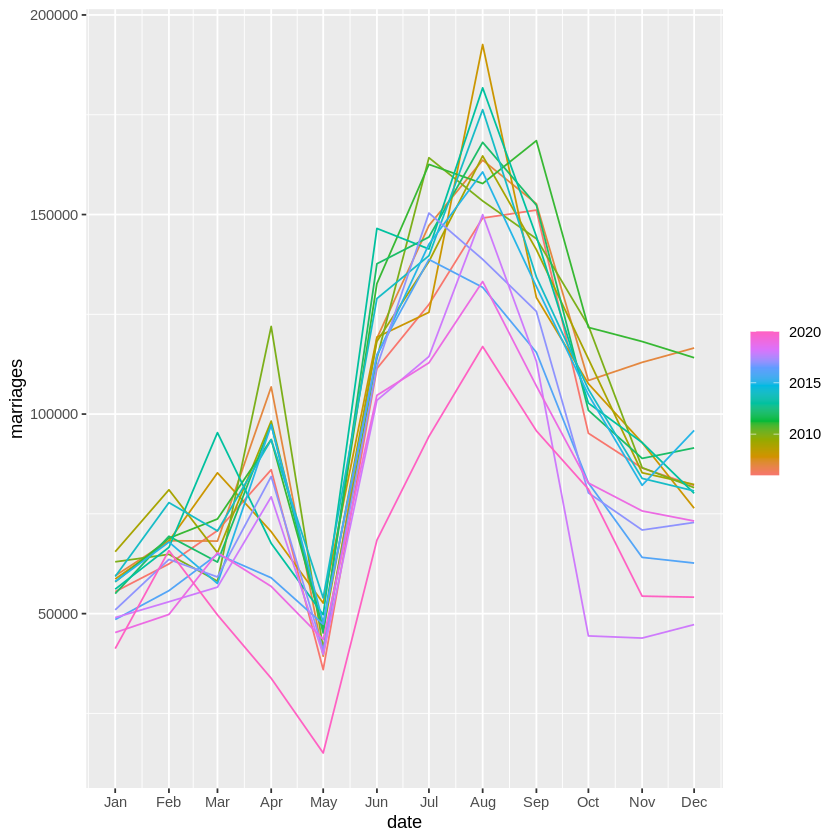

In [24]:
gg_season(data_rf, marriages)

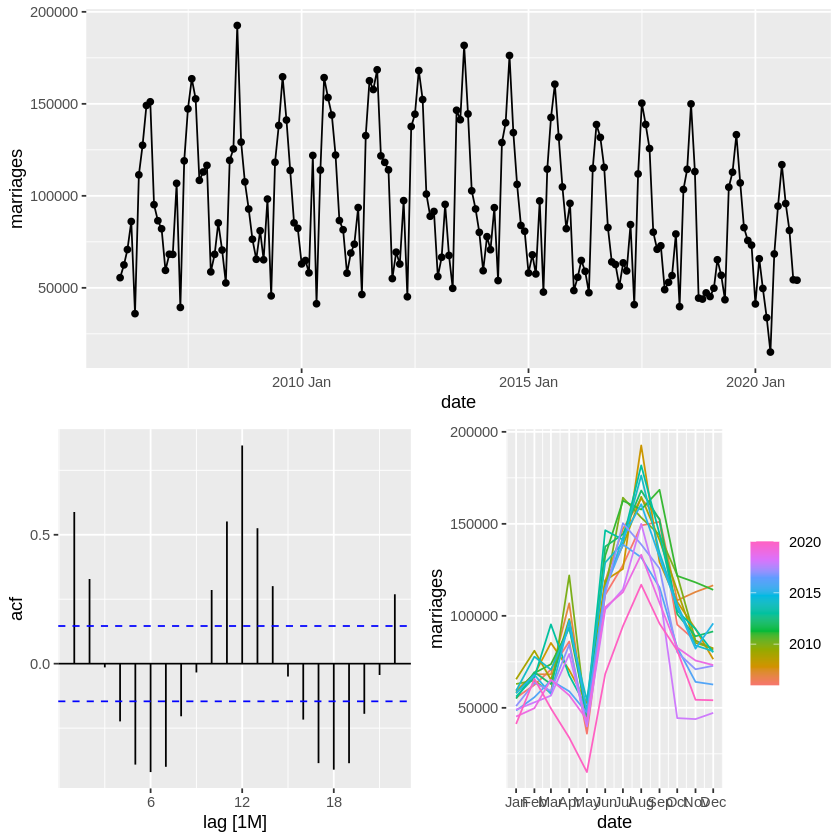

In [25]:
gg_tsdisplay(data_rf, marriages)

STL - шаманский алгоритм выделения сезонности.

Для каждого региона с помощью STL извлечём силу сезонного эффекта и силу тренда.

In [28]:
overview = features(data_ts, marriages, feat_stl)
head(overview)



Warning message:
“1 error encountered for feature 1
[1] series is not periodic or has less than two periods
”


region,trend_strength,seasonal_strength_year,seasonal_peak_year,seasonal_trough_year,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01000000000 Алтайский край,0.7863342,0.9459207,8,5,6.619482e+04,-3512.991,-1372.614,-0.20215516,0.3945084
030 Центральный федеральный округ,0.4671973,0.9062845,8,5,9.321314e+09,-27586.169,-24219.523,-0.18495785,0.2693333
03000000000 Краснодарский край,0.3534627,0.8855469,9,5,5.068487e+06,-2162.454,-3253.002,-0.07477949,0.2691713
031 Северо-Западный федеральный округ,0.6347040,0.9387588,8,5,7.457720e+07,-9716.845,-11392.423,0.16001609,0.3552749
032 Южный федеральный округ (по 2009 год),0.2698858,0.9124872,9,5,5.664434e+09,1549.378,-4234.009,-0.37017639,0.6569995
033 Приволжский федеральный округ,0.6381187,0.9216474,8,5,2.238357e+09,-32440.345,-22456.461,-0.23281128,0.2513814


Warning message:
“Removed 1 rows containing missing values (geom_point).”


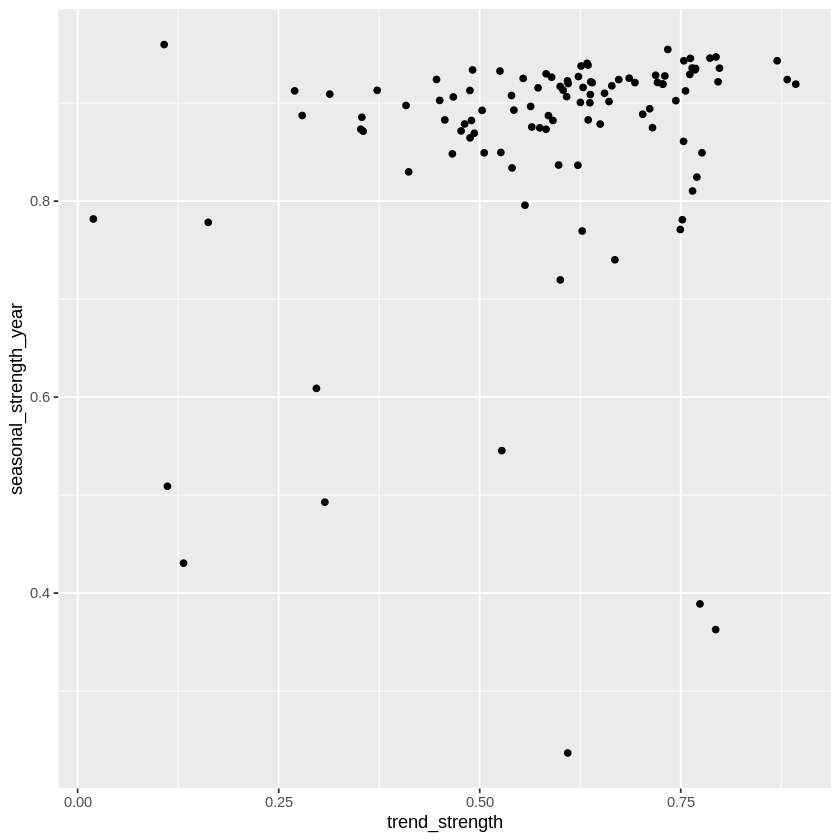

In [30]:
qplot(data=overview, x=trend_strength, y=seasonal_strength_year)

In [31]:
slice_min(overview, seasonal_strength_year, n=5)

region,trend_strength,seasonal_strength_year,seasonal_peak_year,seasonal_trough_year,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
96000000000 Чеченская Республика,0.6094859,0.2367607,2,1,1.395543e+06,-2.530253e+03,513.300594,0.36044187,0.3329186
46001000000 Московская обл. в старых границах,0.7933970,0.3627272,6,1,3.770603e+09,-1.225607e+04,-197.539095,0.34790883,0.5147110
26000000000 Республика Ингушетия,0.7739004,0.3888928,3,9,1.228362e+02,-6.235724e+02,44.937615,0.08148208,0.1019786
"30100000000 Корякский округ, входящий в состав Камчатского края",0.1316827,0.4305063,0,5,6.474425e-02,8.584218e-01,-2.549583,-0.13158912,0.1935165
77000000000 Чукотский автономный округ,0.3073819,0.4927638,0,5,2.385811e-01,-5.653441e+01,-12.893752,-0.07258901,0.1970669


Поиграем в прогноз свадеб два года назад!

In [32]:
tail(data_rf)

region,marriages,date
<chr>,<int>,<mth>
643 Российская Федерация,94393,2020 Jul
643 Российская Федерация,116921,2020 Aug
643 Российская Федерация,95794,2020 Sep
643 Российская Федерация,81188,2020 Oct
643 Российская Федерация,54375,2020 Nov
643 Российская Федерация,54121,2020 Dec


In [ ]:
library(lubridate) # для работы с датами
train = filter(data_rf, date < ymd("2018-12-31"))

In [35]:
tail(train)

region,marriages,date
<chr>,<int>,<mth>
643 Российская Федерация,114416,2018 Jul
643 Российская Федерация,149966,2018 Aug
643 Российская Федерация,113178,2018 Sep
643 Российская Федерация,44413,2018 Oct
643 Российская Федерация,43870,2018 Nov
643 Российская Федерация,47252,2018 Dec


In [37]:
mod_table = model(train, 
        base = SNAIVE(marriages), 
        aaa = ETS(marriages ~ error('A') + trend('A') +  season('A')),
        aaa_log = ETS(log(marriages) ~ error('A') + trend('A') +  season('A')))

In [38]:
mod_table

region,base,aaa,aaa_log
<chr>,<model>,<model>,<model>
643 Российская Федерация,<SNAIVE>,"<ETS(A,A,A)>","<ETS(A,A,A)>"


На перекрёстных данных можно глянуть в сторону пакета caret.

In [40]:
glimpse(train)

Rows: 156
Columns: 3
Key: region [1]
$ region    <chr> "643 Российская Федерация", "643 Российская Федерация", "643…
$ marriages <int> 55509, 62449, 70798, 86055, 35960, 111409, 127475, 149120, 1…
$ date      <mth> 2006 Jan, 2006 Feb, 2006 Mar, 2006 Apr, 2006 May, 2006 Jun, …


In [41]:
mod_table %>% select(aaa) %>% report()

Series: marriages 
Model: ETS(A,A,A) 
  Smoothing parameters:
    alpha = 0.1553983 
    beta  = 0.007089094 
    gamma = 0.0001002107 

  Initial states:
     l        b        s1        s2       s3       s4       s5       s6
 94332 1006.792 -11610.57 -9271.104 5839.619 42794.43 63341.91 45270.36
       s7        s8        s9       s10       s11       s12
 24890.14 -51336.48 -8335.827 -29630.52 -30799.97 -41151.98

  sigma^2:  148473421

     AIC     AICc      BIC 
3740.179 3744.614 3792.027 


Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


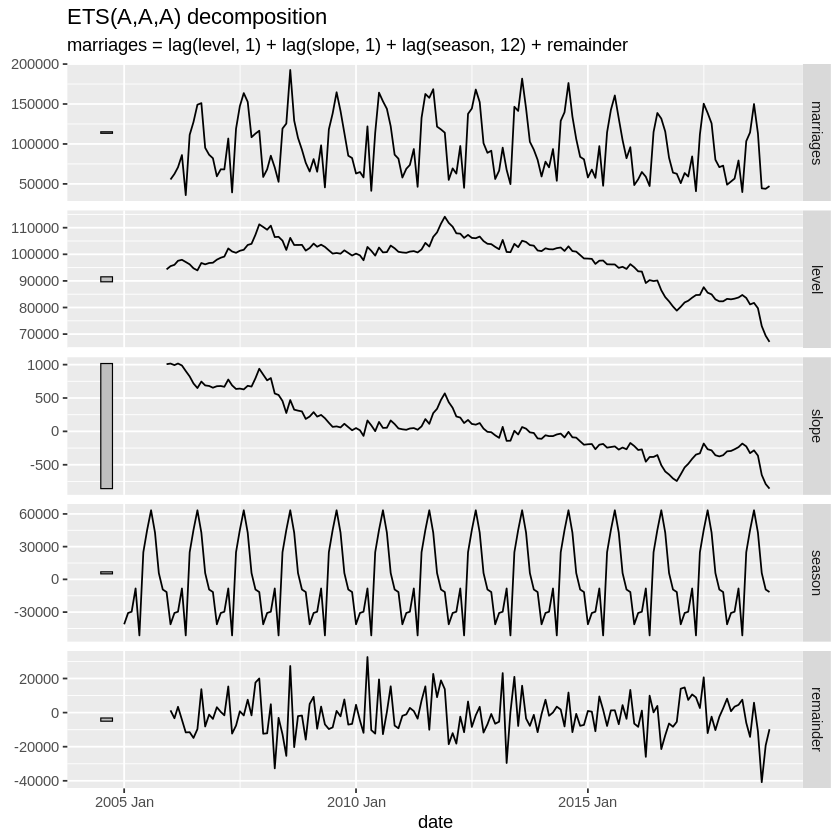

In [43]:
mod_table %>% select(aaa) %>% components() %>% autoplot()

In [53]:
mod_table %>% select(aaa) %>% components() 

.model,date,marriages,level,slope,season,remainder
<chr>,<mth>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
aaa,2005 Jan,NA,NA,NA,-41151.984,NA
aaa,2005 Feb,NA,NA,NA,-30799.970,NA
aaa,2005 Mar,NA,NA,NA,-29630.520,NA
aaa,2005 Apr,NA,NA,NA,-8335.827,NA
aaa,2005 May,NA,NA,NA,-51336.477,NA
aaa,2005 Jun,NA,NA,NA,24890.137,NA
aaa,2005 Jul,NA,NA,NA,45270.363,NA
aaa,2005 Aug,NA,NA,NA,63341.909,NA
aaa,2005 Sep,NA,NA,NA,42794.425,NA


In [44]:
mod_table = mutate(mod_table, mixed = (base + aaa + aaa_log) / 3)
mod_table

region,base,aaa,aaa_log,mixed
<chr>,<model>,<model>,<model>,<model>
643 Российская Федерация,<SNAIVE>,"<ETS(A,A,A)>","<ETS(A,A,A)>",<COMBINATION>


In [47]:
fcst = forecast(mod_table, h = "2 years")
fcst %>% head()

region,.model,date,marriages,.mean
<chr>,<chr>,<mth>,<dist>,<dbl>
643 Российская Федерация,base,2019 Jan,"N(49005, 2.5e+08)",49005
643 Российская Федерация,base,2019 Feb,"N(52972, 2.5e+08)",52972
643 Российская Федерация,base,2019 Mar,"N(56637, 2.5e+08)",56637
643 Российская Федерация,base,2019 Apr,"N(79258, 2.5e+08)",79258
643 Российская Федерация,base,2019 May,"N(39756, 2.5e+08)",39756
643 Российская Федерация,base,2019 Jun,"N(1e+05, 2.5e+08)",103451


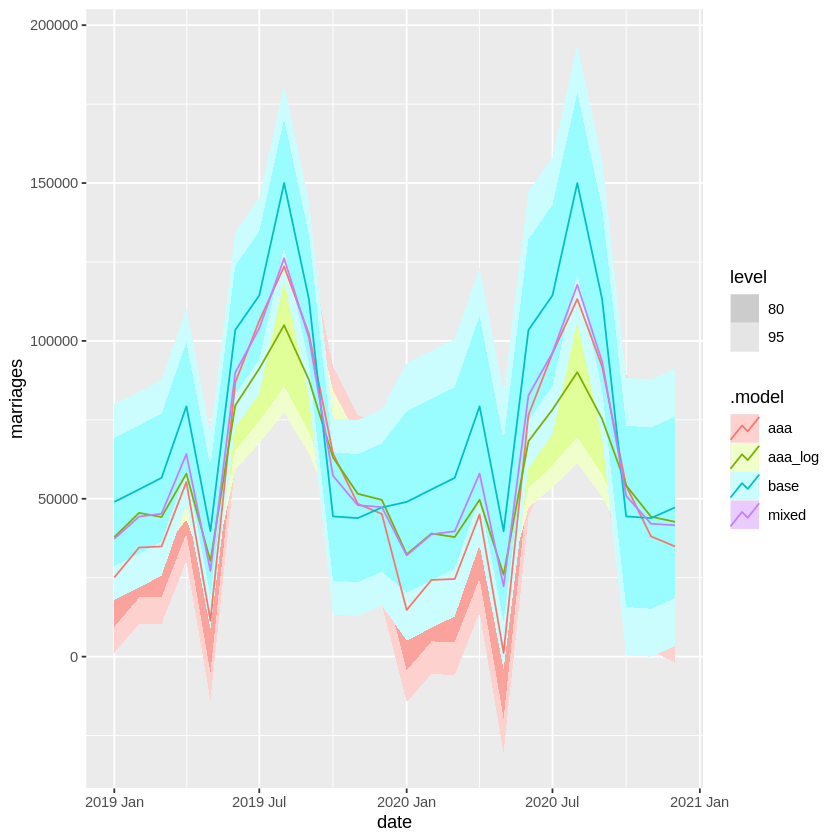

In [48]:
autoplot(fcst)

Warning message in mask$eval_all_filter(dots, env_filter):
“Incompatible methods (">.vctrs_vctr", ">.Date") for ">"”


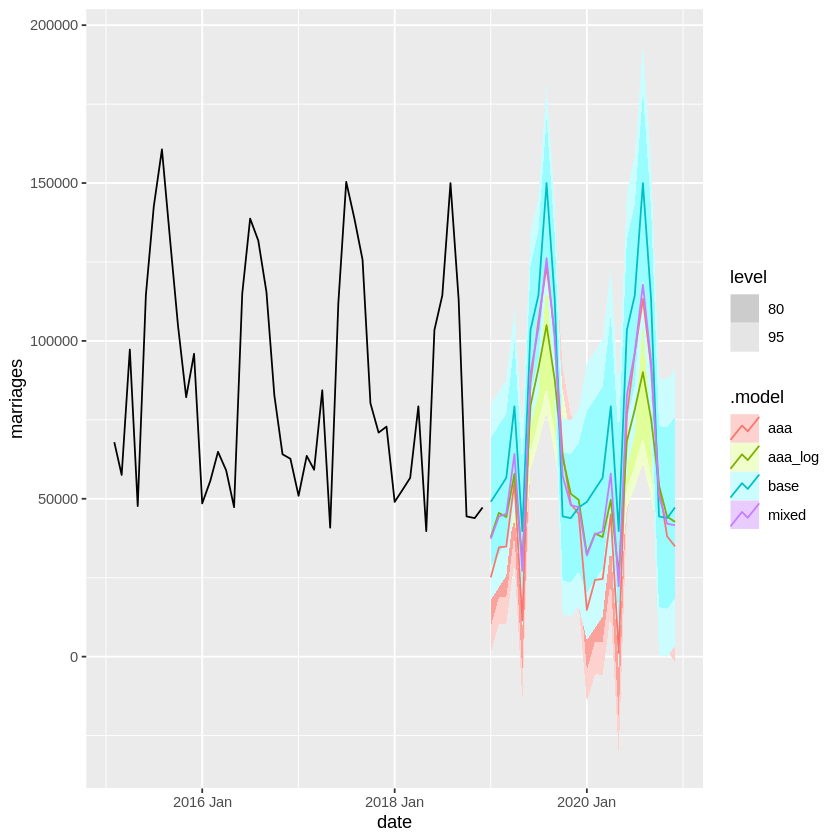

In [51]:
autoplot(fcst, filter(train, date > ymd("2015-01-01")))

In [52]:
accuracy(fcst, data_rf)

.model,region,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aaa,643 Российская Федерация,Test,15337.595,20188.51,17090.91,27.43368,31.34398,1.429920,1.274821,0.2311690
aaa_log,643 Российская Федерация,Test,14149.109,18439.53,16467.41,14.90041,24.97978,1.377754,1.164380,0.4409405
base,643 Российская Федерация,Test,-2811.792,21963.66,17539.96,-11.67545,31.98417,1.467489,1.386914,0.4490569
mixed,643 Российская Федерация,Test,8891.637,16172.64,13540.80,10.21955,23.22195,1.132897,1.021236,0.3564395


Полезные ссылки :)

[R studio conference 2020](https://github.com/rstudio-conf-2020/time-series-forecasting)

[Rob Hyndman, Forecasting principles and practice](https://otexts.com/fpp3/)

[Сергей Мастицкий, Анализ временных рядов с помощью R](https://ranalytics.github.io/tsa-with-r/)

Другие пакеты в R на которые стоит обратить внимание при прогнозировании :)

[modeltime](https://business-science.github.io/modeltime/)

[forecastML](https://nredell.github.io/forecastML/)